# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [4]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()

# My Question

What is the biggest spammer of random requests (random meaning 404 requests by external IP) for 12/5 on my network server where are they located, who are they, and how much do they effect my network speed and what is the average time they start searching the server

Log Lines 5k logs: 'http://10.7.6.29:3100/loki/api/v1/query_range?query={job=%22nginx-syntaxes%22}%20|%20json%20status=%22status%22,%20request_method=%22request_method%22,%20server=%22server_name%22%20|%20status%20=%20`404`%20|%20request_method%20=%20`GET`%20|%20server%20=%20`ftp.syntaxes.org`&start=1733382000&end=1733425200&limit=5000'

Cloudflare Ping avg: `http://10.7.6.29:9090/api/v1/query_range?query=ping_average_response_ms&start=1733382000&end=1733425200&step=8s`

# My Analysis

In [ ]:
import bs4 as bs
import random
import pandas as pd
import seaborn as sb
import numpy as np
import datetime
import requests as rq
import pickle
import json
import time
from collections import Counter
import matplotlib.pyplot as plt
# PVLAES4RV3LWZCBE

def save_pickle(file, value):
    pickle.dump(value, open(file, "wb"))
def load_pickle(file):
    return pickle.load(open(file, "rb"))

<Axes: xlabel='time', ylabel='ping_time'>

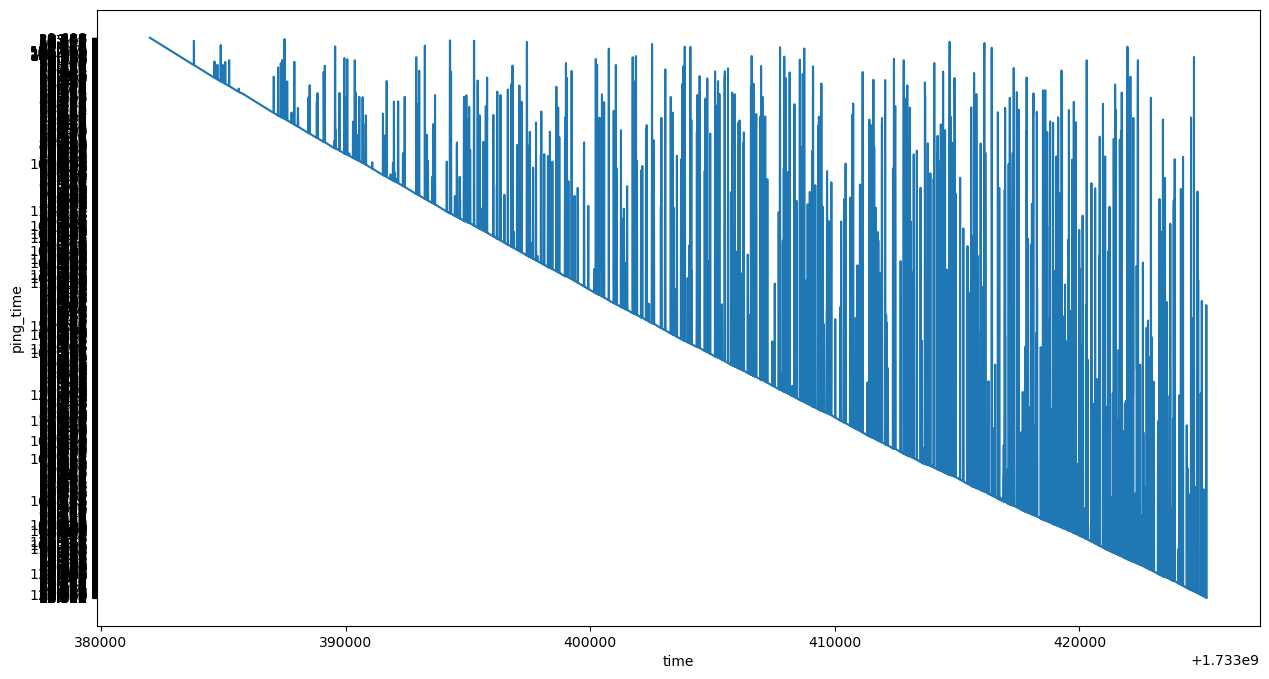

In [64]:
#URL = "http://10.7.6.29:9090/api/v1/query_range?query=ping_average_response_ms&start=1733382000&end=1733425200&step=8s"
#save_pickle("cloudflare_ping_time.p", json.loads(rq.get(URL).content))

#URL = "http://10.7.6.29:3100/loki/api/v1/query_range?query={job=%22nginx-syntaxes%22}%20|%20json%20status=%22status%22,%20request_method=%22request_method%22,%20server=%22server_name%22%20|%20status%20=%20`404`%20|%20request_method%20=%20`GET`%20|%20server%20=%20`ftp.syntaxes.org`&start=1733382000&end=1733425200&limit=5000"
#save_pickle("requests.p", json.loads(rq.get(URL).content))

requests = load_pickle("requests.p")
cloudflare_ping_time = load_pickle("cloudflare_ping_time.p")

requests_sorted = {"info": [], "log_lines": []}

for request in requests['data']['result']:
    if len(request['values']) >= 100:
        requests_sorted['info'].append(request['stream'])
        log_lines = []
        for x in request['values']:
            log_line = json.loads(x[1])
            log_line['time_local'] = datetime.datetime.strptime(log_line['time_local'], "%d/%b/%Y:%H:%M:%S %z")
            log_lines.append(log_line)
        requests_sorted['log_lines'].append(log_lines)

info_per_autonms_system = {"time": [], "auto_sys": [], "country": [], "ip": [], "request_uri": []}

count = -1
for x in requests_sorted['info']:
    count += 1
    for log in requests_sorted['log_lines'][count]:
        info_per_autonms_system['auto_sys'].append(x['geoip_autonomous_system_organization'])
        info_per_autonms_system['country'].append(x['geoip_country_name'])
        info_per_autonms_system['time'].append(log['time_local'])
        info_per_autonms_system['ip'].append(log['remote_addr'])
        info_per_autonms_system['request_uri'].append(log['request_uri'])

info = pd.DataFrame(info_per_autonms_system)
ping_time = {"time": [], "ping_time": []}

for x in cloudflare_ping_time['data']['result'][0]['values']:
    ping_time['time'].append(x[0])
    ping_time['ping_time'].append(x[1])

ping = pd.DataFrame(ping_time)

plt.figure(figsize=(15,8))
#sb.countplot(data=info, x="ip")
#sb.countplot(data=info, x="time")
sb.lineplot(data=ping, x='time', y='ping_time')

# My Answer

### Write your answer here.